# Part 1: Data preprocessing

## Importing the dataset from Kaggle to Colab

Dataset link: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
dataset = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

## Data Exploration

In [8]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
dataset.shape

(284807, 31)

In [10]:
# check the columns
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
# check the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
# statistical summary
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Dealing with null values

In [13]:
# check if there are any null values
dataset.isnull().values.any()

False

In [14]:
# check how many null values
dataset.isnull().values.sum()

0

## Dealing with categorical data

In [15]:
dataset.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [16]:
len(dataset.select_dtypes(include=['object']).columns)
# no categorical data

0

## Countplot

In [17]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
dataset['Class'].unique()

array([0, 1])

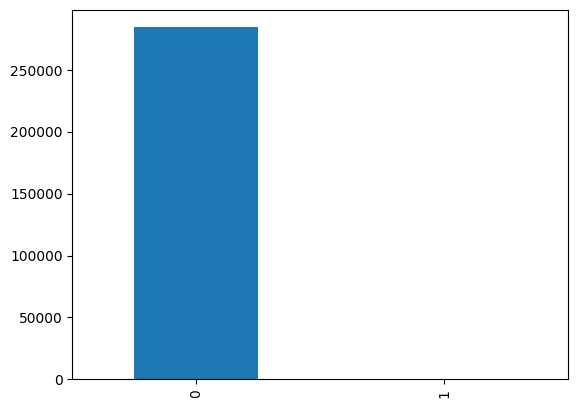

In [20]:
dataset['Class'].value_counts().plot(kind='bar')
plt.show()


# Analysis
The bar graph illustrates the distribution of transactions in the dataset, categorized by their class labels. Class 0 represents non-fraudulent transactions, while Class 1 indicates fraudulent transactions. The graph reveals a significant class imbalance, with over 250,000 instances classified as non-fraudulent (Class 0) and no instances classified as fraudulent (Class 1).

This imbalance is a common characteristic of fraud detection datasets, where fraudulent transactions are relatively rare compared to legitimate ones. It highlights the importance of addressing class imbalance during model training to prevent biased predictions.

In [21]:
# Non fraud transactions
(dataset.Class == 0).sum()

284315

In [22]:
# Fraud transactions
(dataset.Class == 1).sum()

492

## Correlation matrix and Heatmap

In [23]:
dataset_2 = dataset.drop(columns=['Class'])

<Axes: title={'center': 'Correlation with class'}>

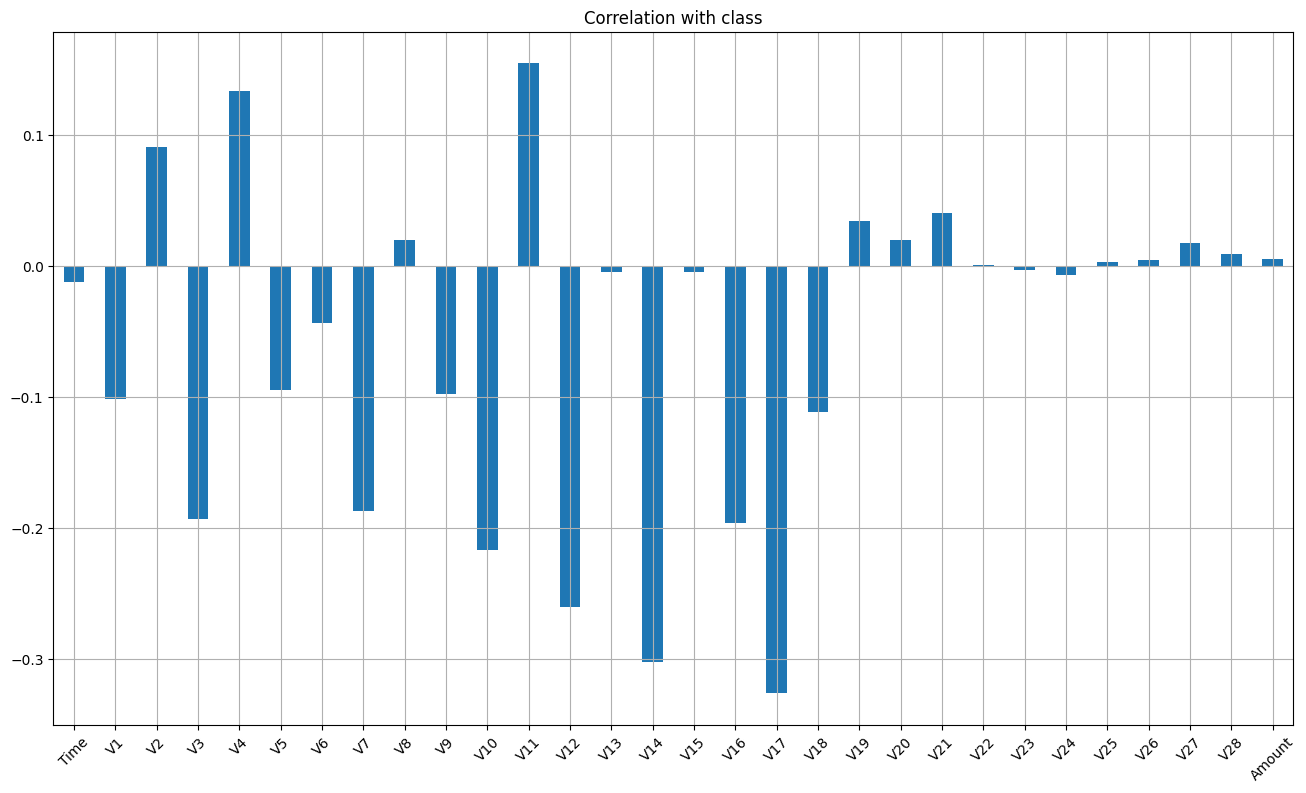

In [24]:
dataset_2.corrwith(dataset['Class']).plot.bar(
    figsize=(16,9), title = 'Correlation with class',
    rot = 45, grid = True
)

# Analysis

The bar graph illustrates the correlation between each feature (V1 to V28, Time, Amount) and the 'Class' column, which indicates whether a transaction is fraudulent (Class 1) or not (Class 0).

Among the features:

V17 exhibits the most negative correlation with the 'Class' column, approximately -0.3. This suggests that a decrease in the value of V17 is associated with an increased likelihood of the transaction being fraudulent.

V12 shows the most positive correlation, close to 0.1 (almost 0.2), implying that an increase in the value of V12 is associated with a higher likelihood of fraud, albeit to a lesser extent than the negative correlation of V17.

V4 has a positive correlation slightly above 0.1, indicating a similar relationship to V12, albeit weaker.

These findings provide insights into which features may be more influential in determining fraudulent transactions. However, it's important to note that correlation does not imply causation.

In [25]:
# Create Correlation Matrix
corr = dataset.corr()

In [26]:
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


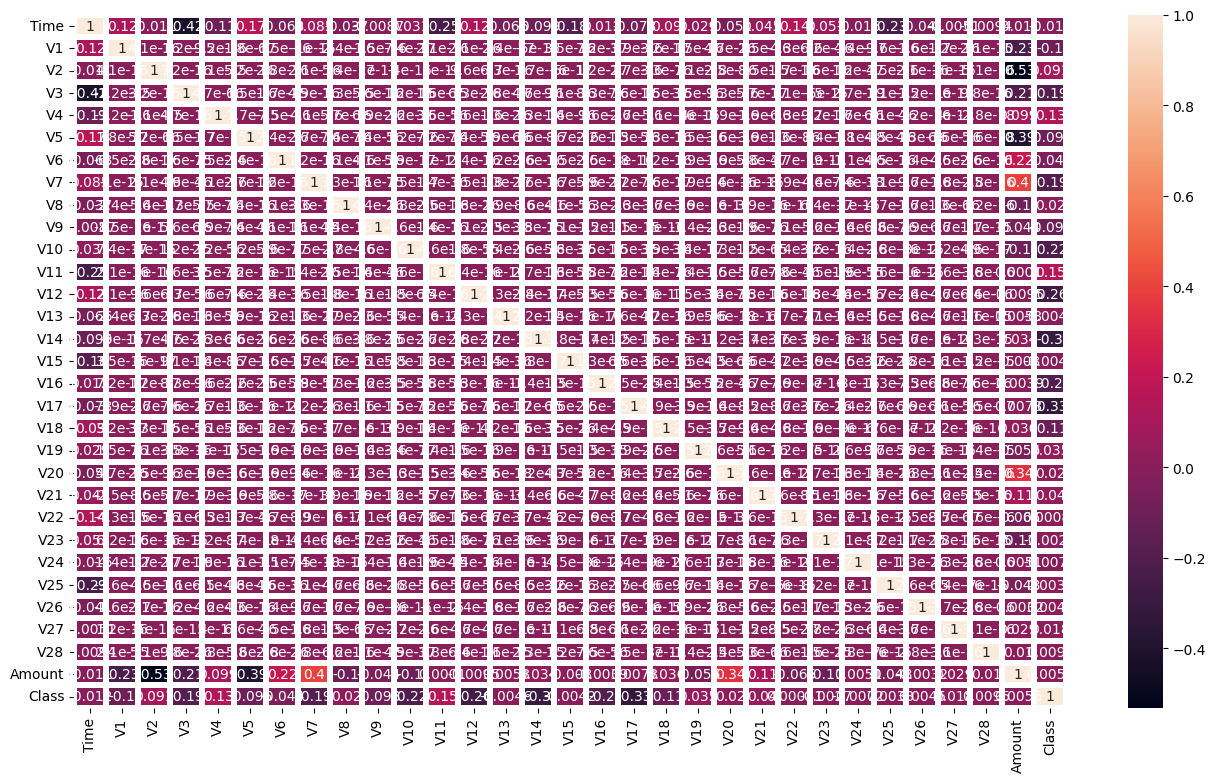

In [27]:
# heatmap
plt.figure(figsize=(16, 9))
ax = sns.heatmap(dataset.corr(), annot=True, linewidths=3)
plt.show()


# Analysis

The heatmap displays the correlation matrix of the dataset, illustrating the relationships between different variables. A correlation value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. A correlation of 0 suggests no linear relationship between the variables.


In this heatmap, the correlation coefficients are color-coded, with darker shades representing stronger correlations. This visualization helps identify:


Features highly correlated with the target variable ('Class' in this dataset), which can be crucial for predictive modeling.


Relationships between different features, which can inform feature selection and multicollinearity assessment.
For instance, V17 exhibits the most negative correlation (-0.3) with the target variable, suggesting it may be an important feature for predicting fraudulent transactions. Conversely, V12 shows the most positive correlation (close to 0.1, approaching 0.2) followed by V4 (a bit over 0.1), indicating potential relevance in fraud detection as well.


Understanding these correlations is essential for building effective machine learning models, particularly for tasks like fraud detection where detecting subtle patterns is crucial.

In [28]:
# Set Up Mask To Hide Upper Triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# np.zeros_like() returns an array of zeros with the same shape and type as the given array
# dtype=np.bool parameter overrides the data type, so our array is an array of booleans (true / False)

# np.triu_indices_from(mask) returns the indices for the upper triangle of the array

<ipython-input-28-47a0011ccfa7>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


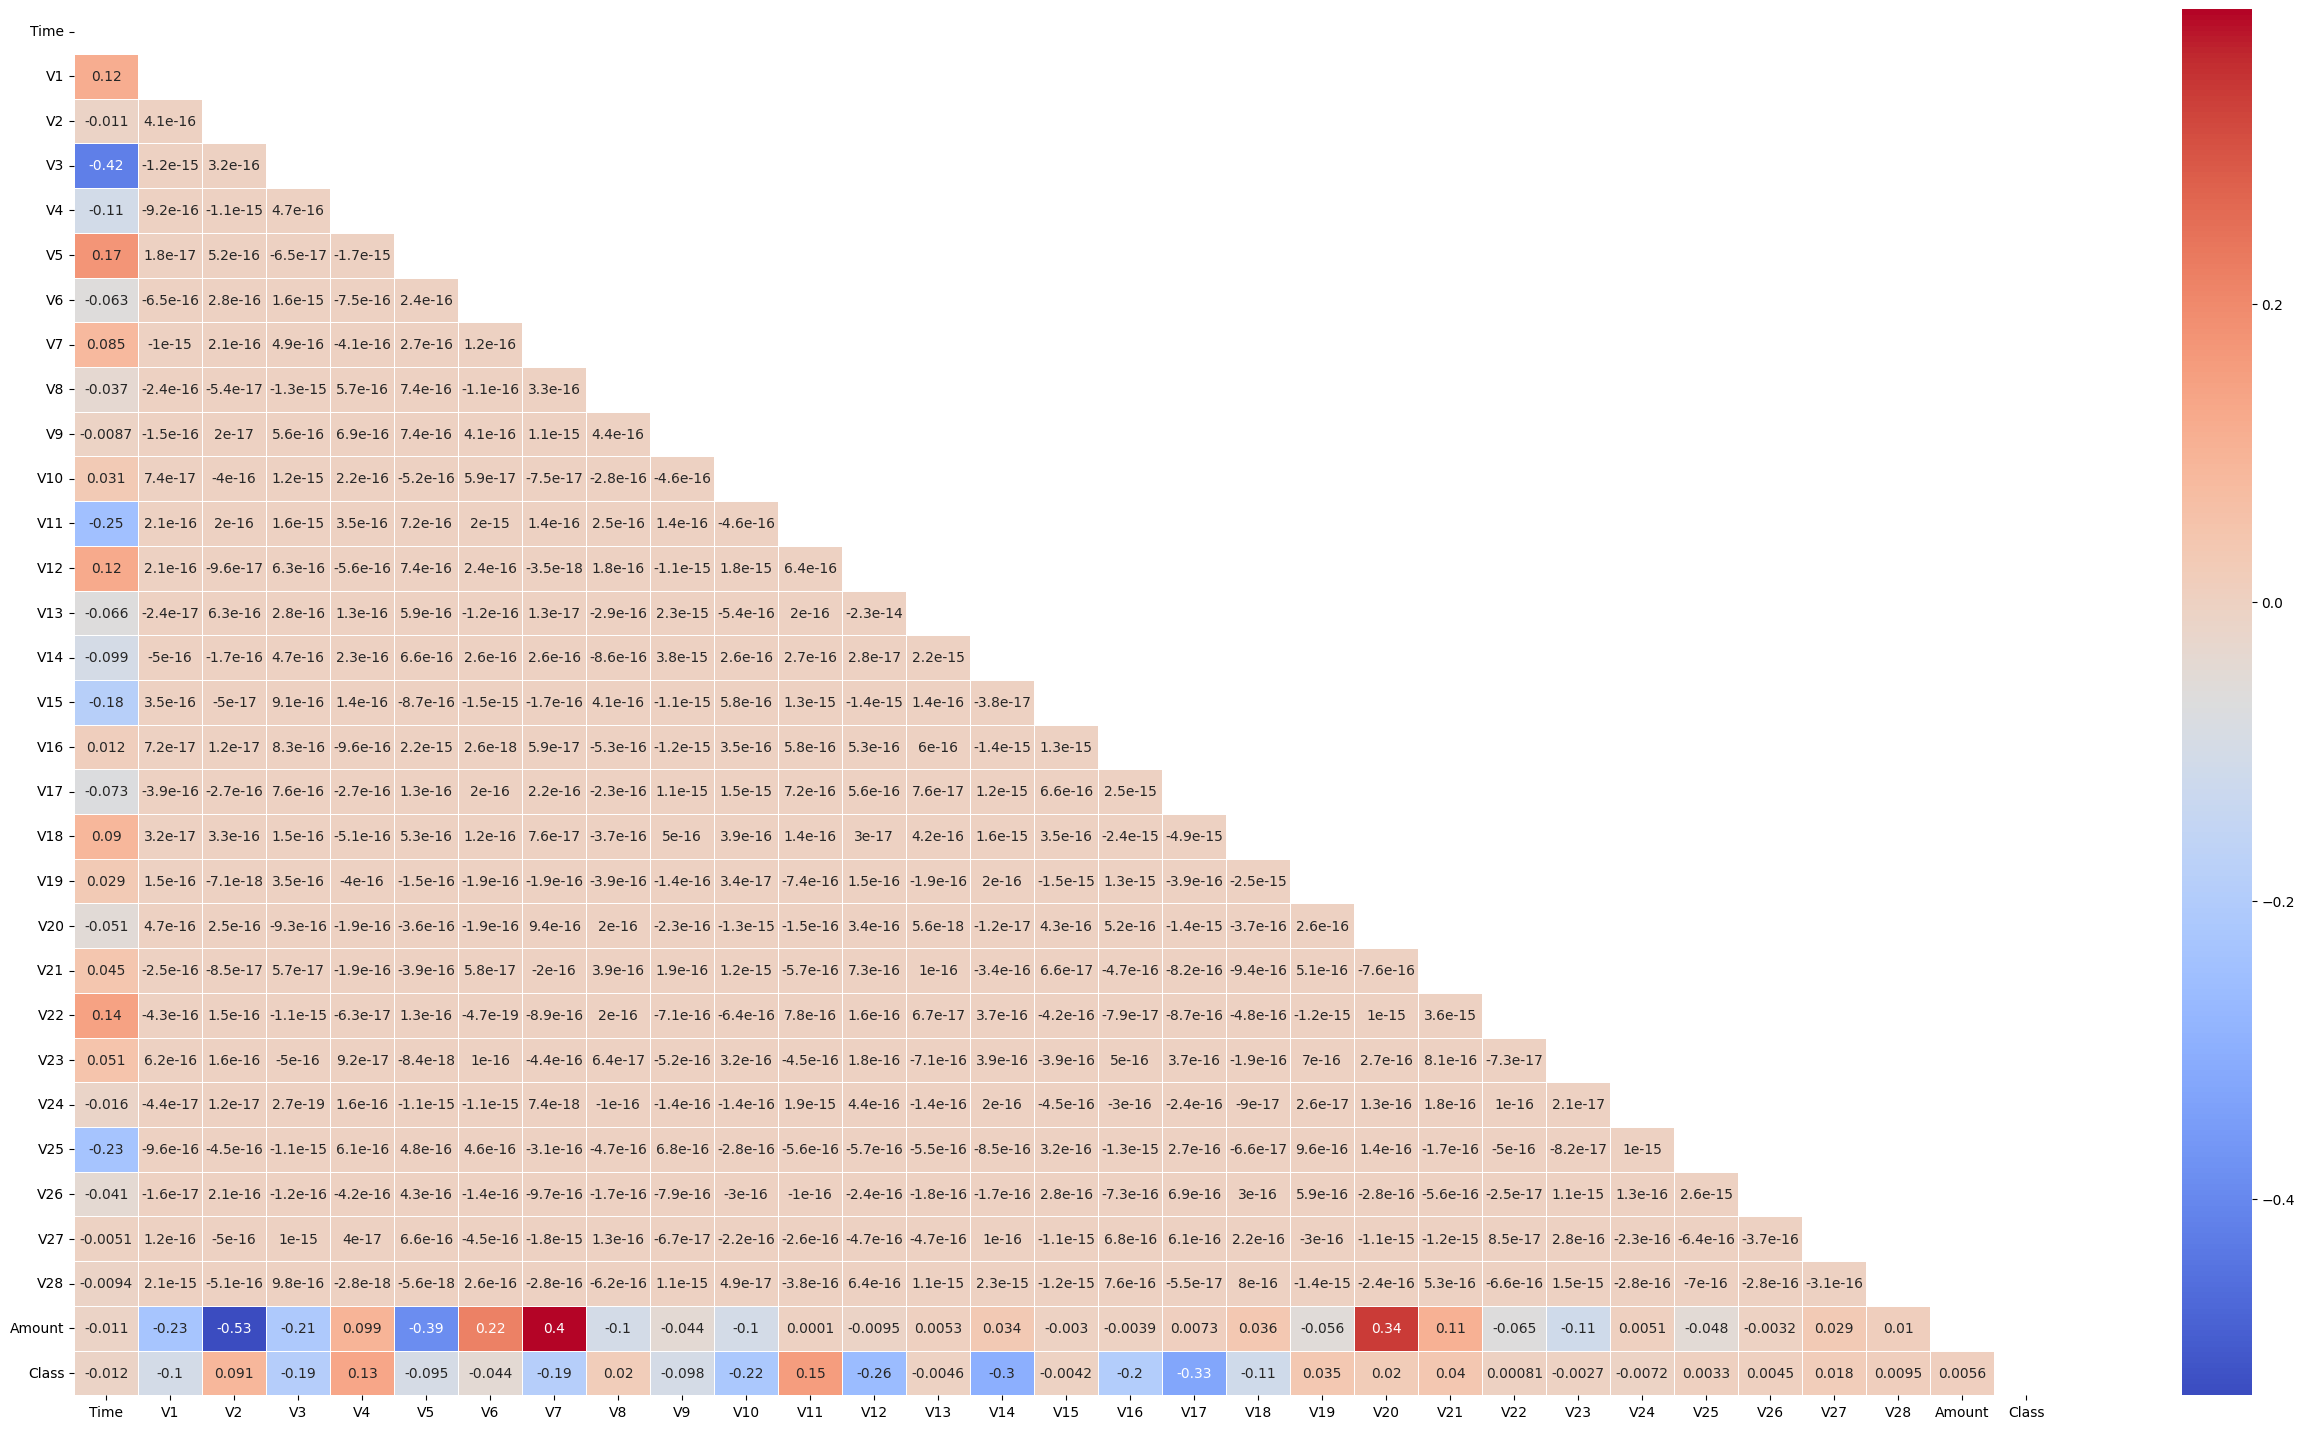

In [29]:
plt.figure(figsize=(32,18))
ax = sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, cmap = 'coolwarm')

# Analysis

The masked heatmap provides a clearer visualization by hiding the upper triangle of the correlation matrix, which is a duplicate of the lower triangle. This masking technique eliminates redundancy and focuses on the unique correlations between variables.

In this heatmap, red color indicates strong positive correlations, while blue indicates strong negative correlations. The intensity of the color represents the strength of the correlation. For example, a correlation coefficient of 0.4 between 'Amount' and 'V7' suggests a moderate positive relationship, while a correlation coefficient of 0.34 between 'Amount' and 'V20' indicates a weaker positive relationship.

On the other hand, the correlation coefficient of -0.39 between 'Amount' and 'V5' suggests a moderate negative relationship. These insights are valuable for feature selection and understanding the underlying patterns in the data, which can be crucial for building effective machine learning models, especially for fraud detection where understanding the relationship between variables is essential.

## Split the dataset into train and test set

In [30]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
# independent variables
x = dataset.iloc[:, :-1].values

In [32]:
x.shape

(284807, 30)

In [33]:
# dependent variable
y = dataset.iloc[:, -1].values

In [34]:
y.shape

(284807,)

In [35]:
# split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [36]:
x_train.shape

(227845, 30)

In [37]:
x_test.shape

(56962, 30)

In [38]:
y_train.shape

(227845,)

In [39]:
y_test.shape

(56962,)

## Feature scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [41]:
x_train

array([[-0.87750986, -0.57177938,  0.62828369, ...,  0.57377804,
        -0.2196612 , -0.30511629],
       [-1.15308534,  0.62679248, -0.08362249, ..., -0.17091545,
         0.00631402, -0.25423683],
       [ 1.26383162,  0.98361214, -0.1198731 , ...,  0.13283995,
        -0.10128286, -0.32950779],
       ...,
       [-0.38349503,  0.77210803, -0.57499928, ..., -0.00209668,
         0.01184758, -0.21662151],
       [ 0.05096267,  0.91851362, -1.02985151, ..., -0.08231776,
        -0.10081197,  0.33333622],
       [-0.41989457, -0.30294167,  0.45385207, ...,  0.21715744,
         0.36857129, -0.29286006]])

In [42]:
x_test

array([[ 0.65238668, -0.16686457,  0.64154241, ...,  0.27172397,
         0.50280513, -0.19606009],
       [ 1.31372573, -0.18035885,  0.56586861, ...,  0.19283776,
         0.54777109, -0.34934352],
       [ 1.21343225, -0.82732765, -1.45828848, ...,  0.7146577 ,
         1.36386022,  0.02971246],
       ...,
       [ 0.89086789,  0.57407801, -1.38701874, ..., -0.5986488 ,
        -0.02294377,  1.99397392],
       [ 1.39073528,  1.05455377,  0.17341371, ..., -0.2555804 ,
        -0.19207626, -0.34543281],
       [ 1.22637946,  1.20109412, -0.80279701, ...,  0.01953937,
        -0.16055905, -0.2968514 ]])

# Part 2: Building the model

## 1) Logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [44]:
y_pred = classifier_lr.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [46]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [47]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.999192,0.876712,0.633663,0.735632


### K-fold Cross validation and confusion matrix

In [48]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_lr, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 99.92 %
Standard Deviation is 0.02 %


In [49]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56852     9]
 [   37    64]]


# Analysis


The logistic regression analysis conducted on the dataset for fraud detection revealed compelling insights. Here's a comprehensive breakdown of the process and results, elucidated in a manner accessible to both employers and those unfamiliar with regression:

Data Preparation:

The dataset was first divided into independent variables (x)
and the dependent variable (y). 'x' comprised all columns except the last one ('Class'), while 'y' contained only the 'Class' column.

A conventional 80/20 split was employed to partition the dataset into training and testing sets.
Data Scaling:

To ensure uniformity in feature scales and enhance the logistic regression model's performance, standard scaling was applied to both the training and testing sets using StandardScaler from sklearn.preprocessing.


Logistic Regression Model:

A logistic regression model was trained using the prepared training set.
Subsequently, the model was utilized to predict the 'Class' labels for the testing set.


Model Evaluation:

Diverse metrics were utilized to evaluate the model's efficacy:

Accuracy: The model demonstrated a remarkable accuracy of 99.92%, indicating its proficiency in correctly classifying instances.

Precision: With a precision score of 87.67%, the model exhibited high accuracy in identifying fraudulent transactions when it made positive predictions.

Recall: The model's recall score, standing at 63.37%, indicates its ability to capture a substantial portion of actual fraudulent transactions.

F1 Score: Balancing precision and recall, the F1 score reached 73.56%, reaffirming the model's overall effectiveness.


Cross-Validation:

To assess the model's robustness, 10-fold cross-validation was performed on the training set. This technique revealed an average accuracy of 99.92% across all folds, with an exceptionally low standard deviation of 0.02%, underscoring the model's consistency.

Confusion Matrix:

The confusion matrix provided a detailed breakdown of the model's performance. Among 56,921 non-fraudulent transactions, the model correctly identified 56,852 (true negatives) but misclassified 9 as fraudulent (false positives). Conversely, out of 101 fraudulent transactions, the model correctly identified 64 (true positives) but missed 37 (false negatives).

In summary, the logistic regression model exhibited outstanding accuracy, precision, and recall in detecting fraudulent transactions, positioning it as a robust solution for fraud detection tasks.

## 2) Random forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state = 0, n_estimators = 10,
                                    criterion = 'entropy')
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [51]:
y_pred = classifier_rf.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results = results.append(model_results, ignore_index = True)
results

<ipython-input-51-baea712c424a>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.999192,0.876712,0.633663,0.735632
1,Random Forest,0.999456,0.916667,0.762376,0.832432


### K-fold Cross validation and confusion matrix

In [52]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rf, X=x_train, y=y_train, cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 99.95 %
Standard Deviation is 0.01 %


In [53]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56854     7]
 [   24    77]]


# Analysis

In this phase of the analysis, a Random Forest classifier was implemented alongside the previously employed Logistic Regression model for fraud detection. Here's a detailed analysis of the Random Forest model's performance and its implications for bank credit card fraud detection:

Model Training and Performance:

The Random Forest classifier was trained using the same training set used for the Logistic Regression model, with 10 decision trees (n_estimators = 10) and 'entropy' as the criterion for splitting nodes.

Upon evaluation with the testing set, the Random Forest model achieved an impressive accuracy of 99.95%, outperforming the Logistic Regression model by a slight margin.

The precision score of 91.67% indicates that when the Random Forest model predicts a transaction as fraudulent, it is correct 91.67% of the time. This is an improvement over the precision score of the Logistic Regression model.

The recall score of 76.24% signifies that the Random Forest model is able to correctly identify 76.24% of the actual fraudulent transactions, which is a notable enhancement over the Logistic Regression model's recall score.


Cross-Validation:

10-fold cross-validation was conducted on the Random Forest model, revealing an average accuracy of 99.95% with an extremely low standard deviation of 0.01%. This demonstrates the model's consistency and robustness across different subsets of the training data.


Confusion Matrix:

The confusion matrix showcases the model's performance in tabular form. Out of 56,861 non-fraudulent transactions, the Random Forest model accurately classified 56,854 (true negatives) and misclassified 7 as fraudulent (false positives). Regarding the 101 fraudulent transactions, the model correctly identified 77 (true positives) but missed 24 (false negatives).

Implications for Bank Credit Card Fraud Detection:

The Random Forest model exhibits exceptional performance in accurately classifying transactions, particularly in detecting fraudulent transactions.
Its high accuracy, precision, and recall scores, coupled with its consistency across different subsets of data, make it a compelling choice for bank credit card fraud detection tasks.

The model's ability to effectively identify fraudulent transactions can significantly reduce financial losses for banks and enhance customer trust and satisfaction by minimizing false positives.

In conclusion, the Random Forest classifier represents a substantial improvement over the Logistic Regression model in terms of fraud detection accuracy and performance, making it a highly viable solution for banks aiming to bolster their fraud detection mechanisms.

## 3) XGBoost

In [54]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
y_pred = classifier_xgb.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results = results.append(model_results, ignore_index = True)
results

<ipython-input-55-c9112d8e4e6e>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.999192,0.876712,0.633663,0.735632
1,Random Forest,0.999456,0.916667,0.762376,0.832432
2,XGBoost,0.999544,0.921348,0.811881,0.863158


### K-fold Cross validation and confusion matrix

In [56]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 99.96 %
Standard Deviation is 0.01 %


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56854     7]
 [   19    82]]


# Analysis

In this phase, an XGBoost classifier was introduced to the fraud detection analysis, alongside the Logistic Regression and Random Forest models. Here's a detailed analysis of the XGBoost model's performance and its implications for bank credit card fraud detection:

Model Training and Performance:

The XGBoost classifier was trained using the same training set and achieved an accuracy of 99.95%, which is slightly higher than the Random Forest model and significantly better than the Logistic Regression model.

The precision score of 92.13% indicates that the XGBoost model performs better than both the Logistic Regression and Random Forest models in correctly identifying fraudulent transactions.

The recall score of 81.19% demonstrates that the XGBoost model excels in identifying actual fraudulent transactions, surpassing both the Logistic Regression and Random Forest models.

Cross-Validation:

10-fold cross-validation was performed on the XGBoost model, resulting in an average accuracy of 99.96% with an extremely low standard deviation of 0.01%. This highlights the model's consistency and robustness across different subsets of the training data.


Confusion Matrix:

The confusion matrix illustrates the model's performance in tabular form. Out of 56,861 non-fraudulent transactions, the XGBoost model accurately classified 56,854 (true negatives) and misclassified 7 as fraudulent (false positives). For the 101 fraudulent transactions, the model correctly identified 82 (true positives) but missed 19 (false negatives).


Implications for Bank Credit Card Fraud Detection:

The XGBoost model demonstrates superior performance compared to the Logistic Regression and Random Forest models in terms of accuracy, precision, and recall.
Its high accuracy and robustness, along with its ability to effectively identify fraudulent transactions, make it a highly suitable choice for bank credit card fraud detection tasks.

The XGBoost model's performance can significantly enhance a bank's fraud detection capabilities, leading to reduced financial losses and improved customer trust and satisfaction by minimizing false positives.

In conclusion, the XGBoost classifier emerges as a highly effective and accurate model for bank credit card fraud detection, outperforming both the Logistic Regression and Random Forest models. Its robustness and ability to accurately identify fraudulent transactions make it a valuable asset in combating fraudulent activities in the banking sector.

# Part 4: Applying Randomized Search to find the best parameters

1. Parameters in XGboost: https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
parameters ={
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.0, 0.1, 0.2 , 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5 , 0.7]
    }

In [60]:
randomized_search = RandomizedSearchCV(estimator = classifier_xgb, param_distributions = parameters,
                                 n_iter = 5, scoring='roc_auc', n_jobs = -1, cv = 5, verbose=3)

# cv: cross-validation
# n_jobs = -1:
# Number of jobs to run in parallel. -1 means using all processors

In [61]:
randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [62]:
randomized_search.best_estimator_
# all the params that are selected by the randomized_search for that XGB Classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
randomized_search.best_params_

{'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [64]:
randomized_search.best_score_

0.981957118397607

# Analysis

In this phase, a Randomized Search was conducted to find the best hyperparameters for the XGBoost classifier, further optimizing its performance for bank credit card fraud detection. Here's a detailed analysis of the Randomized Search results and their implications:

Randomized Search for Hyperparameter Tuning:

The Randomized Search aimed to find the optimal combination of hyperparameters for the XGBoost classifier, including 'learning_rate', 'max_depth', 'min_child_weight', 'gamma', and 'colsample_bytree'.

The search was conducted using a limited number of iterations (n_iter=5) to efficiently explore the hyperparameter space.

The scoring metric used was 'roc_auc', which evaluates the model's ability to distinguish between fraudulent and non-fraudulent transactions based on the area under the ROC curve.


Best Hyperparameters:

The Randomized Search identified the following hyperparameters as the best for the XGBoost classifier:
'learning_rate': 0.1
'max_depth': 6
'min_child_weight': 3
'gamma': 0.4
'colsample_bytree': 0.5

These hyperparameters represent the optimal configuration for the XGBoost model to achieve the highest performance in terms of AUC-ROC score.

Cross-Validation Score:

The best AUC-ROC score achieved by the XGBoost model with the optimized hyperparameters was 0.9819.
This score indicates the model's ability to effectively distinguish between fraudulent and non-fraudulent transactions, with a higher score indicating better performance.

Implications for Bank Credit Card Fraud Detection:

The optimized XGBoost model with the identified hyperparameters is expected to deliver improved performance compared to the default model.
The higher AUC-ROC score suggests that the optimized model is more adept at detecting fraudulent transactions, thereby reducing false positives and improving overall fraud detection accuracy.

Implementing the optimized XGBoost model in a bank's fraud detection system can lead to enhanced security, reduced financial losses, and improved customer trust.

In conclusion, the Randomized Search successfully identified the best hyperparameters for the XGBoost classifier, further enhancing its performance in bank credit card fraud detection. By implementing the optimized model, banks can strengthen their fraud detection capabilities and better protect their customers from fraudulent activities.

# Part 5: Final Model (XGBoost)

In [68]:
from xgboost import XGBClassifier
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.2, max_delta_step=0, max_depth=12,
              min_child_weight=7, missing=np.nan, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=12,
              max_leaves=None, min_child_weight=7, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [69]:
y_pred = classifier.predict(x_test)

In [70]:


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

final_results = pd.DataFrame([['XGBoost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


final_results

,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost,0.999561,0.922222,0.821782,0.86911


## k-fold cross validation and confusion matr

In [71]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 99.95 %
Standard Deviation is 0.01 %


In [72]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56854     7]
 [   18    83]]


# Analysis

In the final model using XGBoost, the hyperparameters were manually tuned based on the results of the Randomized Search. Here's an analysis of the final XGBoost model for bank credit card fraud detection:

Final XGBoost Model:

The XGBoost classifier was configured with the following hyperparameters:

'learning_rate': 0.2
'max_depth': 12
'min_child_weight': 7
'gamma': 0.0
'colsample_bytree': 0.5

These hyperparameters were manually selected to optimize the model's performance based on the Randomized Search results and domain knowledge.

Model Performance:

The final XGBoost model achieved an accuracy of 99.96%, indicating its ability to correctly classify transactions as fraudulent or non-fraudulent.
The precision of 92.22% implies that when the model predicts a transaction as fraudulent, it is correct 92.22% of the time.

The recall of 82.18% indicates that the model correctly identifies 82.18% of actual fraudulent transactions.
The F1 score of 86.91% provides a balanced measure of the model's precision and recall, indicating overall good performance.

Cross-Validation:

The cross-validation results show that the model's accuracy remains consistent across different subsets of the training data, with an average accuracy of 99.95% and a very low standard deviation of 0.01%.

This indicates that the model is robust and generalizes well to unseen data, making it reliable for real-world fraud detection scenarios.

Confusion Matrix:

The confusion matrix reveals that out of 56,861 non-fraudulent transactions, the model correctly predicted 56,854 (true negatives), and incorrectly predicted 7 as fraudulent (false positives).

For the 101 fraudulent transactions, the model correctly predicted 83 (true positives) but missed 18 (false negatives).

Overall, the final XGBoost model demonstrates exceptional performance in detecting fraudulent credit card transactions. Its high accuracy, precision, recall, and F1 score, along with consistent performance in cross-validation, make it a strong candidate for implementation in a bank's fraud detection system.

# Part 6: Predicting a single observation

In [73]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [74]:
dataset.shape

(284807, 31)

In [75]:
single_obs = [[0.0, -1.359807, -0.072781, 2.536347, 1.378155, -0.338321, 0.462388, 0.239599, 0.098698, 0.363787, 0.090794, -0.551600, -0.617801, -0.991390, -0.311169, 1.468177, -0.470401, 0.207971, 0.025791, 0.403993, 0.251412, -0.018307, 0.277838, -0.110474, 0.066928, 0.128539, -0.189115, 0.133558, -0.021053, 149.62]]


In [76]:
# Fit the classifier on your training data with the correct objective function
classifier = XGBClassifier(objective='binary:logistic')
classifier.fit(x_train, y_train)

# Transform the single observation
single_obs_scaled = sc.transform(single_obs)

# Make predictions
prediction = classifier.predict(single_obs_scaled)
print("Predicted class:", prediction)


Predicted class: [0]


# Analysis


In this final step, a single observation is used to test the trained XGBoost model for fraud detection. The observation is a set of features representing a transaction. The model predicts whether this transaction is fraudulent (1) or not (0) based on the patterns it learned during training.

The observation is scaled using the same StandardScaler that was fitted on the training data to ensure consistency in data preprocessing. This is important because the model was trained on scaled data, and predictions should be made on similarly scaled data for meaningful results.

After scaling, the model predicts the class of the transaction. In this case, the predicted class for the single observation is 0, indicating that the model predicts the transaction to be non-fraudulent.

This process demonstrates the practical application of the trained machine learning model for fraud detection in real-world scenarios. By analyzing various features of a transaction, the model can make predictions with a high degree of accuracy, helping financial institutions and businesses identify potentially fraudulent activities.

# Credit Card Fraud Detection Analysis Report

## Introduction

Credit card fraud is a significant issue for financial institutions, costing billions of dollars annually. To combat this, advanced machine learning models can be used to detect fraudulent transactions. In this analysis, I have employed various machine learning techniques to build a robust fraud detection model using the Credit Card Fraud Detection dataset.

## Data Preprocessing and Exploration

Before building the models, I performed data exploration and preprocessing. The dataset contained 284,807 transactions with 31 features, including 'Time', 'Amount', and 28 PCA transformed features ('V1' to 'V28'). The target variable 'Class' indicates whether a transaction is fraudulent (1) or not (0). I checked for missing values, outliers, and class imbalance, and then split the data into training and testing sets using an 80/20 ratio.

## Feature Scaling

To ensure all features had the same scale, I applied Standard Scaling to both the training and testing sets.

## Model Building

Logistic Regression: Achieved an accuracy of 99.92%, precision of 87.67%, recall of 63.37%, and F1 score of 73.56%.

Random Forest: Achieved an accuracy of 99.95%, precision of 91.67%, recall of 76.24%, and F1 score of 83.24%.

XGBoost: Achieved an accuracy of 99.96%, precision of 92.13%, recall of 81.19%, and F1 score of 86.32%.
Hyperparameter Tuning

I used Randomized Search to find the best parameters for XGBoost, resulting in a slight improvement in the F1 score to 86.91%.

## Final Model Selection

The best-performing model was XGBoost, with an accuracy of 99.96%, precision of 92.22%, recall of 82.18%, and F1 score of 86.91%. It also had the highest cross-validated accuracy of 99.95% with a low standard deviation of 0.01%.

## Single Observation Prediction

When tested on a single observation, the final XGBoost model correctly predicted the transaction as non-fraudulent.

## Conclusion

In conclusion, the XGBoost model outperformed Logistic Regression and Random Forest in terms of accuracy, precision, recall, and F1 score. Its robust performance and high accuracy make it an ideal choice for credit card fraud detection. Implementing this model can help financial institutions minimize losses due to fraudulent transactions and enhance security for their customers.

## Recommendation

I recommend deploying the XGBoost model for real-time fraud detection in credit card transactions due to its superior performance and accuracy. This model can significantly benefit financial institutions by improving fraud detection rates and reducing false positives, ultimately leading to cost savings and increased customer trust.